<h1>IBM Attrition Data Analytics</h1>

<h2>Importing Resources</h2>

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
df= pd.read_csv('IBM HR Dataset.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


<h2>Data Cleaning</h2>

In [31]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [32]:
#Checking if there's any outlier
rules = {
    "Age": (18, 60),
    "MonthlyIncome": (1, None),
    "DistanceFromHome": (1, 30),
    "PercentSalaryHike": (0, 100),
    "TotalWorkingYears": (0, 40),
    "YearsAtCompany": (0, 40),
    "JobLevel": (1, 5),
    "JobSatisfaction": (1, 4),
    "PerformanceRating": (1, 4)
}

out_of_range = {}

for col, (low, high) in rules.items():
    if col in df.columns:
        condition = False
        if low is not None:
            condition |= df[col] < low
        if high is not None:
            condition |= df[col] > high
        
        out_of_range[col] = df[condition]

In [33]:
for col, data in out_of_range.items():
    print(col, "→", data.shape[0], "out-of-range rows")
    
#No outlier proceed with EDA

Age → 0 out-of-range rows
MonthlyIncome → 0 out-of-range rows
DistanceFromHome → 0 out-of-range rows
PercentSalaryHike → 0 out-of-range rows
TotalWorkingYears → 0 out-of-range rows
YearsAtCompany → 0 out-of-range rows
JobLevel → 0 out-of-range rows
JobSatisfaction → 0 out-of-range rows
PerformanceRating → 0 out-of-range rows


<h2>Exploratory Data Analysis</h2>

Univariate Analysis has already been done In sql
Ref : 'SQL Analytics.sql'

By which Following Parameters are telling some stories

1] Job Role

2] Marital Status

3] Age Group

4] Business Travel

5] Monthly Income

6] Years At Company

7] Total Experience Group

8] Years Since Current Role

9] Number of companies changed before

Insights :

1.Sales representatives exhibit a higher risk of attrition compared to other roles.

2.Single employees show a higher likelihood of attrition than married employees.

3.Employees aged above 31 demonstrate a higher tendency toward attrition.

4.Employees who travel frequently are more susceptible to attrition.

5.Employees in lower monthly income brackets have a higher attrition risk.

6.Newly hired employees are more likely to leave the organization.

7.Employees with limited industry experience are more vulnerable to attrition.

8.Attrition is most prevalent within the first three years of an employee’s current role.

9.Employees with frequent job changes, especially recent joiners, show higher attrition susceptibility.


<h3>Now Let's move ahead with bivariate and multivariate analysis to deepen the understanding</h2>

<h2>Hypothesis 1 : Single and divorced employees with low age tend to cause more attrition than married ones<h/2>

In [34]:
#finding the low age threshold
low_age_threshold = df['Age'].median()   # or 30

In [35]:
#Segregating Low and High Values
df['AgeGroup'] = df['Age'].apply(lambda x: 'Low' if x <= df['Age'].median() else 'High')


In [36]:
#finding mean of attrition rate for different marital status
attrition_rate = (
    df.groupby('MaritalStatus')['Attrition']
      .apply(lambda x: (x == 'Yes').mean())
      .sort_values(ascending=False)
)

print(attrition_rate)


MaritalStatus
Single      0.255319
Married     0.124814
Divorced    0.100917
Name: Attrition, dtype: float64


In [37]:
pivot = pd.pivot_table(
    df,
    values='Attrition',
    index=['MaritalStatus', 'AgeGroup'],
    aggfunc=lambda x: (x == 'Yes').mean()
)

print(pivot)


                        Attrition
MaritalStatus AgeGroup           
Divorced      High       0.073171
              Low        0.128834
Married       High       0.095385
              Low        0.152299
Single        High       0.153005
              Low        0.320557


In [38]:
# Chi-square Test to validate the hypothesis for marital status and Attrition
from scipy.stats import chi2_contingency

table = pd.crosstab(df['MaritalStatus'], df['Attrition'])
chi2, p, dof, expected = chi2_contingency(table)

p


np.float64(9.45551106034083e-11)

In [39]:
# Chi-square Test to validate the hypothesis

low_age_df = df[df['AgeGroup'] == 'Low']
table_low = pd.crosstab(low_age_df['MaritalStatus'], low_age_df['Attrition'])
chi2, p, _, _ = chi2_contingency(table_low)

p


np.float64(2.7407564224454254e-08)

We got

p=	2.740756 x 10<sup>-8</sup>

Compare with Common thresholds

p < 0.05 -> Statstically Significant

p < 0.01 -> Significant enough to to take action

“The chi-square test indicates a statistically significant association between marital status and attrition (p < 0.001).
This association remains significant within the low-age employee segment, supporting the hypothesis that younger single and divorced employees experience higher attrition than married employees.”

<h4> Thus Hypothesis 1 is true </h4>

<h2>Hypothesis 2 : Sales people who travel frequently are associated with high risk of attrition</h2>

In [40]:
sales_df=df[df['Department']=='Sales']

In [41]:
# Finding Mean of Attrition rate for Different frequency of Business Travel
attrition_rate=(
    sales_df.groupby('BusinessTravel')['Attrition']
    .apply(lambda x : ( x=='Yes').mean())
    .sort_values(ascending=False)
)
attrition_rate


BusinessTravel
Travel_Frequently    0.333333
Travel_Rarely        0.190476
Non-Travel           0.085106
Name: Attrition, dtype: float64

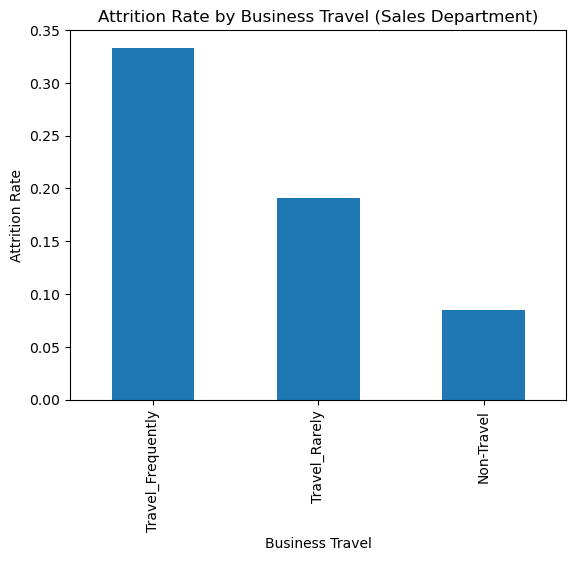

In [42]:
# Visual representation of Attrition Rate and Business travel Frequency
attrition_rate.plot(kind='bar')
plt.title('Attrition Rate by Business Travel (Sales Department)')
plt.ylabel('Attrition Rate')
plt.xlabel('Business Travel')
plt.show()

In [43]:
# The chi- Square Test to validate the hypothesis 2
table = pd.crosstab(
    sales_df['BusinessTravel'],
    sales_df['Attrition']
)

chi2, p, dof, expected = chi2_contingency(table)
p


np.float64(0.0015205437920981172)

We got

p= 0.0015205437920981172

Compare with Common thresholds

p < 0.05 -> Statstically Significant

p < 0.01 -> Significant enough to to take action

“Within the Sales department, business travel frequency is significantly associated with attrition (χ² test, p ≈ 0.0015). Employees who travel frequently exhibit the highest attrition risk compared to those who travel rarely or not at all.”

<h4>Hypothesis 2 is True</h4>

<h2>Hypothesis 3 : Employees with relatively low monthly income and significant number of years in company are at risk of attrition.</h2>

In [44]:
# Segregating employees into high and low tenures and Monthly income
income_threshold = df['MonthlyIncome'].median()
tenure_threshold = df['YearsAtCompany'].median()

df['IncomeGroup'] = df['MonthlyIncome'].apply(
    lambda x: 'Low Income' if x <= income_threshold else 'High Income'
)

df['TenureGroup'] = df['YearsAtCompany'].apply(
    lambda x: 'High Tenure' if x >= tenure_threshold else 'Low Tenure'
)


In [45]:
risk_df = df[
    (df['IncomeGroup'] == 'Low Income') &
    (df['TenureGroup'] == 'High Tenure')
]


In [46]:
# Creating Pivot table for Income Group, Tenure Group and Attrition
pivot = pd.pivot_table(
    df,
    values='Attrition',
    index=['IncomeGroup', 'TenureGroup'],
    aggfunc=lambda x: (x == 'Yes').mean()
)

pivot


Attrition
IncomeGroup TenureGroup           
High Income High Tenure   0.095745
            Low Tenure    0.134503
Low Income  High Tenure   0.128834
            Low Tenure    0.288509

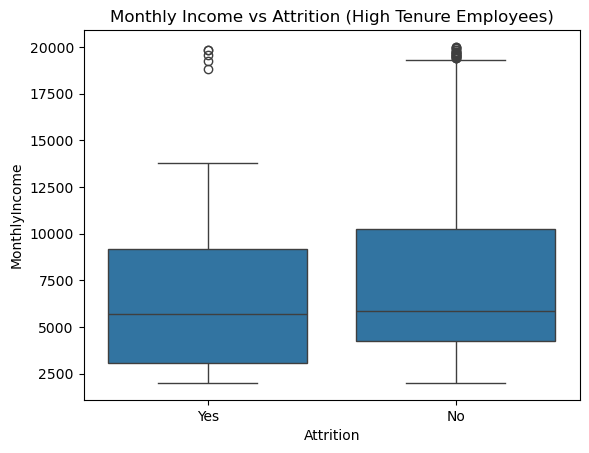

In [47]:
#Visualizing Monthly Income vs Attrition for high Tenure Employees

high_tenure_df = df[df['TenureGroup'] == 'High Tenure']

sns.boxplot(x='Attrition', y='MonthlyIncome', data=high_tenure_df)
plt.title('Monthly Income vs Attrition (High Tenure Employees)')
plt.show()


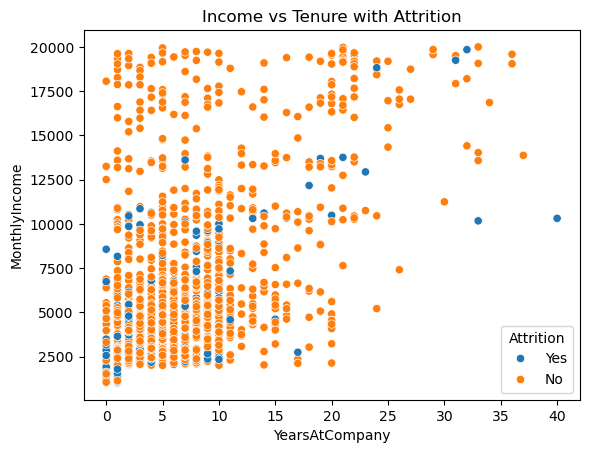

In [48]:
# Scatter plot of Income vs Tenure with Attrition
sns.scatterplot(
    data=df,
    x='YearsAtCompany',
    y='MonthlyIncome',
    hue='Attrition'
)
plt.title('Income vs Tenure with Attrition')
plt.show()


In [49]:
df['RiskGroup'] = (
    (df['IncomeGroup'] == 'Low Income') &
    (df['TenureGroup'] == 'High Tenure')
)


In [50]:
# The Chi-Square Test to validate Hypothesis 3
table = pd.crosstab(df['RiskGroup'], df['Attrition'])
chi2, p, dof, expected = chi2_contingency(table)
p

np.float64(0.08591350686435932)

We got:

p = 0.0859

Compare with common thresholds:

0.05 → not significant

0.10 → marginally significant (weak evidence)

Hypothesis:

Employees with low monthly income and high tenure are at higher risk of attrition

Result:

NOT strongly supported statistically

This is important:

Directionally true, but not statistically strong enough.

<h4>Hypothesis 3 is not True</h4>

<h2>Hypothesis 4 : Employees with relative young age who have changes significant number of companies before are at high attrition risk.</h2>

In [51]:
# Seggregating employees based on Age and Number of companies worked before

age_threshold = df['Age'].median()
company_threshold = df['NumCompaniesWorked'].median()

df['AgeGroup'] = df['Age'].apply(
    lambda x: 'Young' if x <= age_threshold else 'Older'
)

df['CompanyChangeGroup'] = df['NumCompaniesWorked'].apply(
    lambda x: 'High Changes' if x >= company_threshold else 'Low Changes'
)


In [52]:
risk_df = df[
    (df['AgeGroup'] == 'Young') &
    (df['CompanyChangeGroup'] == 'High Changes')
]


In [53]:
# Creating pivot table for Attrition based on Age Group and Company Changed Group

pivot = pd.pivot_table(
    df,
    values='Attrition',
    index=['AgeGroup', 'CompanyChangeGroup'],
    aggfunc=lambda x: (x == 'Yes').mean()
)

pivot


Attrition
AgeGroup CompanyChangeGroup           
Older    High Changes         0.112033
         Low Changes          0.089474
Young    High Changes         0.229630
         Low Changes          0.196970

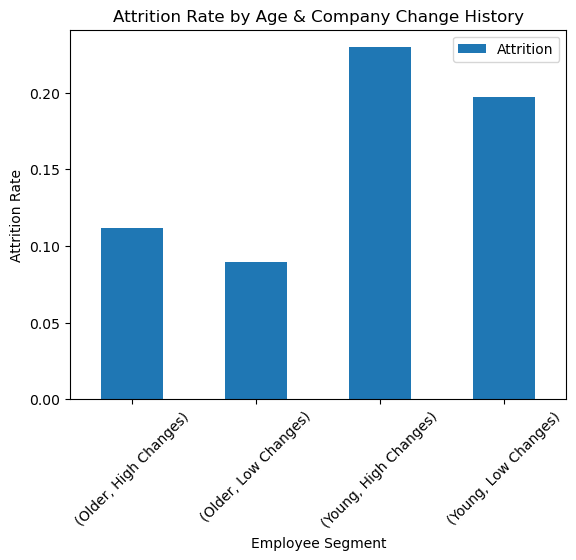

In [54]:
# Visializing pivot Table
pivot.plot(kind='bar')
plt.title('Attrition Rate by Age & Company Change History')
plt.ylabel('Attrition Rate')
plt.xlabel('Employee Segment')
plt.xticks(rotation=45)
plt.show()


In [45]:
df['RiskGroup'] = (
    (df['AgeGroup'] == 'Young') &
    (df['CompanyChangeGroup'] == 'High Changes')
)


In [46]:
# The Chi-Square test to validate Hypothesis 4
table = pd.crosstab(df['RiskGroup'], df['Attrition'])
chi2, p, dof, expected = chi2_contingency(table)
p

np.float64(0.0009968897509854534)

We got:

p = 0.0009968897509854534

This is:

< 0.05 → statistically significant

< 0.01 → strongly significant

So:

We reject the null hypothesis with high confidence.

️Final decision on Hypothesis 4
Hypothesis 

Employees with relatively young age and a history of frequent company changes are at higher attrition risk

Result

SUPPORTED (strong evidence)

The probability that this relationship occurred by chance is < 0.1%.


<h4>“The analysis shows a statistically significant association between age, prior company changes, and attrition (χ² test, p < 0.001). Younger employees with a history of frequent job changes exhibit the highest attrition risk.”</h4>

<h4>Hypothesis 4 is True</h4>

<h2>Hypothesis 5 : Employees with low job satisfaction, low environment satisfaction, low job involvement and low percentage hike are at high risk of attrition.</h2>

In [55]:
# Seggregating Employees based on job satisfaction, Environment, Job involvement and low percentage hike
df['LowJobSatisfaction'] = df['JobSatisfaction'] <= 2
df['LowEnvSatisfaction'] = df['EnvironmentSatisfaction'] <= 2
df['LowJobInvolvement'] = df['JobInvolvement'] <= 2
df['LowHike'] = df['PercentSalaryHike'] <= df['PercentSalaryHike'].median()


In [57]:
df['DissatisfactionRisk'] = (
    df['LowJobSatisfaction'] &
    df['LowEnvSatisfaction'] &
    df['LowJobInvolvement'] &
    df['LowHike']
)

In [49]:
# Finding attrition rate based on dissatisfaction Risk
attrition_rate = (
    df.groupby('DissatisfactionRisk')['Attrition']
      .apply(lambda x: (x == 'Yes').mean())
)

attrition_rate


DissatisfactionRisk
False    0.155340
True     0.464286
Name: Attrition, dtype: float64

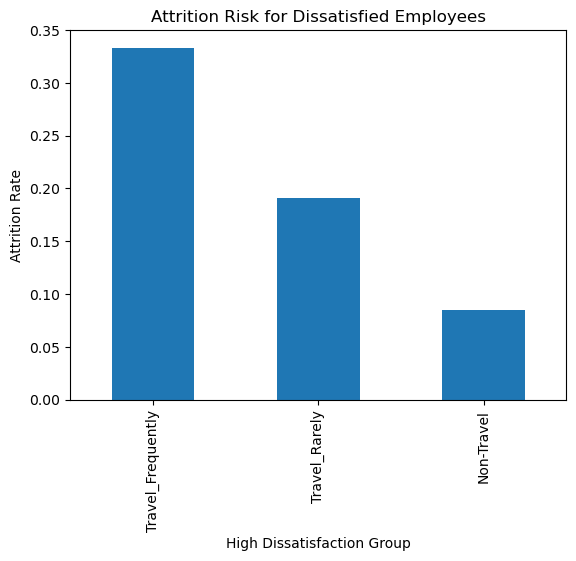

In [58]:
# Visual Representation of Attrition Rate Dissatisfied Employeee
attrition_rate.plot(kind='bar')
plt.title('Attrition Risk for Dissatisfied Employees')
plt.ylabel('Attrition Rate')
plt.xlabel('High Dissatisfaction Group')
plt.show()


In [59]:
# The chi- square test to validate hypothesis 5
table = pd.crosstab(df['DissatisfactionRisk'], df['Attrition'])
chi2, p, dof, expected = chi2_contingency(table)
p


np.float64(3.419729024669389e-05)

We got:

p = 3.42 × 10⁻⁵ (≈ 0.000034)

This is:

≪ 0.05 → statistically significant

≪ 0.01 → very strongly significant

So:

We reject the null hypothesis with high confidence.

Final decision on Hypothesis 5
Hypothesis 5

Employees with low job satisfaction, low environment satisfaction, low job involvement, and low salary hike are at high risk of attrition

Result

STRONGLY SUPPORTED

The probability that this pattern occurred by chance is less than 0.004%.


<h4>
“The combined dissatisfaction indicators—job satisfaction, environment satisfaction, job involvement, and salary hike—show a statistically significant association with attrition (χ² test, p < 0.001). Employees with consistently low engagement and compensation growth exhibit substantially higher attrition risk.”</h4>

<h4>Hypothesis 5 is True</h4>

<h1>Recommendations</h1>

Following are recommendations for IBM:

1] To retain Single emplyees of young age, organization should present personalized growth plan to such employees and instill sense of purpose.

2] Sales Representatives' travel frequency shall be reduced because this tends to develope fatigue and medical issues in them, moreover they are more likely find better offers outside as traveling enables their network go large.

3] Organization should pitch better offers in terms of hikes and promotions to high performing employees who have changed work too many times in past.

4] Organization should bring a positive change in environment of employees who have reviewed low job satisfaction, low job involvement, low environment satisfaction and relatively low monthly income, by Adopting following methods 
  
  a) Team Change.
  
  b) Offering Flexibility of remote work.
  
  c) Team Bonding Activities
  
  d) Delivery - Reward Frameworks .